# PHYS 267 - Chapter 9<br><font color='blue'>Hypothesis Tests using Python</font>
###### Last Updated: Jan 9, 2023 by Dr. Brenda Lee
***

### <font color="blue">9.1 Chapter Overview</font>

In the previous chapter, we discussed the idea of statistical inference through hypothesis testing. In general, we learnt about $p$-values and levels of significance when it came to the idea of hypothesis testing. Knowing this, we can now discuss different types of hypothesis tests based on the kind of data and distribution you have. 

<div class="alert alert-block alert-info">💎<b>Chapter Objectives</b>:<br>
    <ol>
        <li>Understand when to use different hypothesis tests: parametric vs. non-parametric tests</li>
        <li>Know how to leverage Python packages to perform these tests</li>
        <li>Be able to discuss the significance of results after each test is performed</li>
    </ol>
</div>

### <font color="blue">9.2 Types of Hypothesis Tests</font>

Hypothesis test are categorized into two large families:
- **Parametric Tests**: a hypothesis test that is used if the samples follow a *normal distribution* or are approximately normal (in which case assumptions must be made)
- **Non-Parametric Tests**: a hypothesis test that is used if the samples do not follow a normal distribution

But, there's more! For each type of family, we have to consider two additional families that relate to how many samples you have. It makes sense that the test for one sample's significance would be different than one for two samples. As a result, we typically break things down into:
- **One Sample Tests**: a hypothesis test used for just one sample, which is compared with a given value
- **Two Sample Tests**: a hypothesis test used for comparing two or more samples, where tests will include the *correlation* and *difference* between samples
    - Sometimes, you may have **paired samples** which means that they are dependent samples

Can we think of another way to categorize these tests? Yes, there is one more. You can categorize a hypothesis test based on its normal distribution and the number of samples, but you can also categorize it based on the measure you are interested in. The *measure* will be what you want to look for: how close your data is to a **mean**, how **random** your data is, what **distribution** your data is closest too, and whether two samples have **correlation**. 

Let us now take a look at some common tests for each of these categories. There are quite a bit, and specific ones will be analyzed in detail below. In other words, you don't have to know all of them. Just the ones we go through in detail and are common in Physics and related fields. The goal for this course is to be able to pick the correct test and apply them using Python. 

<table>
    <tr>
        <td style="text-align: left;"></td>
        <th scope="col" style="text-align: left;">Sample</th>
        <th scope="col" style="text-align: left;">Measure</th>
        <th scope="col" style="text-align: left;">Hypothesis Test</th>
        <th scope="col" style="text-align: left;">Purpose & Conditions</th>
    </tr>
    <tr style="background:#E8FFE7;">
        <th scope="row" style="text-align: left;">Parametric</th>
        <td style="text-align: left;">One Sample Test</td>
        <td style="text-align: left;">Mean</td>
        <td style="text-align: left; color:'blue";>One Sample t-Test</td>
        <td style="text-align: left;"><b>Purpose: </b>Check observed mean value of normally distributed data against theoretical reference value<br>
            <b>Conditions: </b>Sample size is small, variance unknown
        </td>
    </tr>
    <tr style="background:#E8FFE7;">
        <th scope="row" style="text-align: left;">Parametric</th>
        <td style="text-align: left;">One Sample Test</td>
        <td style="text-align: left;">Mean</td>
        <td style="text-align: left; color:'blue";>Z-Test</td>
        <td style="text-align: left;"><b>Purpose: </b>Check observed mean value of normally distributed data against theoretical reference value<br>
            <b>Conditions: </b>Sample size is large, variance known
        </td>
    </tr>
    <tr style="background:#E7FFF8;">
        <th scope="row" style="text-align: left;">Parametric</th>
        <td style="text-align: left;">Two Sample Test</td>
        <td style="text-align: left;">Correlation</td>
        <td style="text-align: left; color:'blue";>Pearson Correlation Coefficient</td>
        <td style="text-align: left;"><b>Purpose: </b>Measure linear correlation between two sets of data
        </td>
    </tr>
    <tr style="background:#E7FFF8;">
        <th scope="row" style="text-align: left;">Parametric</th>
        <td style="text-align: left;">Two Sample Test</td>
        <td style="text-align: left;">Mean</td>
        <td style="text-align: left; color:'blue";>Two Group t-Test</td>
        <td style="text-align: left;"><b>Purpose: </b>Compare two observed means from independent samples<br>
            <b>Conditions: </b>Sample size is small, variance unknown
        </td>
    </tr>
    <tr style="background:#E7FFF8;">
        <th scope="row" style="text-align: left;">Parametric</th>
        <td style="text-align: left;">Two Sample Test</td>
        <td style="text-align: left;">Mean</td>
        <td style="text-align: left; color:'blue";>Paired t-Test</td>
        <td style="text-align: left;"><b>Purpose: </b>Compare two observed means from paired, dependent samples<br>
            <b>Conditions: </b>Sample size is small, variance unknown
        </td>
    </tr>
    <tr style="background:#E7FFF8;">
        <th scope="row" style="text-align: left;">Parametric</th>
        <td style="text-align: left;">Two Sample Test</td>
        <td style="text-align: left;">Mean</td>
        <td style="text-align: left; color:'blue";>Two Sample Z-Test</td>
        <td style="text-align: left;"><b>Purpose: </b>Compare two observed means from independent samples<br>
            <b>Conditions: </b>Sample size is large, variance known
        </td>
    </tr>
    <tr style="background:#FFE7E7;">
        <th scope="row" style="text-align: left;">Non-Parametric</th>
        <td style="text-align: left;">One Sample Test</td>
        <td style="text-align: left;">Mean</td>
        <td style="text-align: left; color:'blue";>One Sample Wilcoxon's Test</td>
        <td style="text-align: left;"><b>Purpose: </b>Check observed mean value of normally distributed data against theoretical reference value
        </td>
    </tr>
    <tr style="background:#FFE7E7;">
        <th scope="row" style="text-align: left;">Non-Parametric</th>
        <td style="text-align: left;">One Sample Test</td>
        <td style="text-align: left;">Randomness</td>
        <td style="text-align: left; color:'blue";>Runs Test</td>
        <td style="text-align: left;"><b>Purpose: </b>Determine how random your data is
        </td>
    </tr>
    <tr style="background:#FFE7E7;">
        <th scope="row" style="text-align: left;">Non-Parametric</th>
        <td style="text-align: left;">One/Two Sample Test</td>
        <td style="text-align: left;">Distribution</td>
        <td style="text-align: left; color:'blue";>Kolmogorov-Smirnov Test</td>
        <td style="text-align: left;"><b>Purpose: </b>Compare an observed distribution to a reference distribution<br>
            <b>Conditions: </b>Data is continuous
        </td>
    </tr>
    <tr style="background:#FFE7E7;">
        <th scope="row" style="text-align: left;">Non-Parametric</th>
        <td style="text-align: left;">One/Two Sample Test</td>
        <td style="text-align: left;">Distribution</td>
        <td style="text-align: left; color:'blue";>Chi Squared Test</td>
        <td style="text-align: left;"><b>Purpose: </b>Compare an observed distribution to a reference distribution<br>
            <b>Conditions: </b>Data is binned and represents frequencies
        </td>
    </tr>
    <tr style="background:#FCE7FF;">
        <th scope="row" style="text-align: left;">Non-Parametric</th>
        <td style="text-align: left;">Two Sample Test</td>
        <td style="text-align: left;">Correlation</td>
        <td style="text-align: left; color:'blue";>Spearman Rank Correlation</td>
        <td style="text-align: left;"><b>Purpose: </b>Test the association between two samples
        </td>
    </tr>
    <tr style="background:#FCE7FF;">
        <th scope="row" style="text-align: left;">Non-Parametric</th>
        <td style="text-align: left;">Two Sample Test</td>
        <td style="text-align: left;">Mean</td>
        <td style="text-align: left; color:'blue";>Mann-Whitney Test</td>
        <td style="text-align: left;"><b>Purpose: </b>Compare two observed means from independent samples
        </td>
    </tr>
    <tr style="background:#FCE7FF;">
        <th scope="row" style="text-align: left;">Non-Parametric</th>
        <td style="text-align: left;">Two Sample Test</td>
        <td style="text-align: left;">Mean</td>
        <td style="text-align: left; color:'blue";>Wilcoxon's Test</td>
        <td style="text-align: left;"><b>Purpose: </b>Compare two observed means from paired samples
        </td>
    </tr>
</table>

Outside of this, there is also **ANOVA (Analysis of Variance)** which is available forr both parametric and non-parametric data. This is useful for multiple groups and will be briefly mentioned in this chapter. 

### <font color="blue">9.3 Continuous Distributions Derived from the Normal Distribution</font>

Some frequently encountered continuous distributions are closely related to the normal distribution. These distributions will be referenced for different statistical tests.

#### 9.3.1 $t$-Distribution

This is the sample distribution of mean values for samples from a normally distributed population. It is typically used for small sample numbers, when the true mean and standard deviation are not well-known. The $t$-distribution is almost identical to the normal distribution curve, only that it has heavier tails (less of a peak). The probability density function for $t$ is given by:

$$f(x,v) = \frac{\Gamma\left(\frac{v+1}{2}\right)}{\sqrt{\pi\nu}\Gamma\left(\frac{\nu}{2}\right)}\left(1+\frac{x^2}{\nu}\right)^{-(v+1)/2}$$

Where we have:
- $x$ being a real number
- $\nu$ being the degrees of freedom (referred to as `df` in arguments in a Python function)
- $\nu > 0$
- $\Gamma$ is the gamma function (extension or generalization of the factorial function to complex numbers)

Also called the *Student's $t$-distribution* after the W.S. Gosset's pseudonym "Student", this is a commonly used distribution when it comes to analyzing sample data. 

We can use `numpy.random.standard_t(df, size=None)` from NumPy to generate values for a $t$-distribution with $\nu$ degrees of freedom. Note that as the sample size gets large, the $t$-distribution will resemble that of a normal distribution.

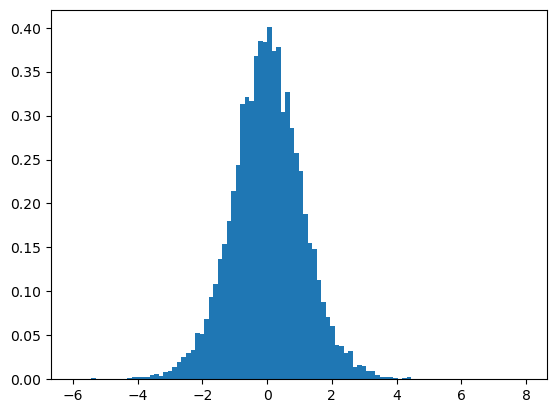

In [6]:
# Let's try to plot a t-distribution
import numpy as np
import matplotlib.pyplot as plt
t_sample = np.random.standard_t(10, size=10000)
t_hist = plt.hist(t_sample, bins=100, density=True)
plt.show()

#### 9.3.2 $\chi$-Squared Distribution

This helps with describing the variability of normally distributed data. But, how do we define this? We say that if a random variable $X$ has a normal distribution ($X \in N(0,1)$), then $X^2$ has a chi-squared distribution, with one degree of freedom ($X^2 \in \chi_1^2$). The sum of squares of $n$ independent and standard normal random variables will then have a chi-squared distribution with $n$ degrees of freedom. We will discuss this in what's commonly known as a "chi-squared test for goodness of fit" when we come to modelling and data fitting in an upcoming chapter. 

First, let's define the probability density function for $\chi^2$:

$$f(x,k) = \frac{1}{1^{k/2}\Gamma(k/2)}x^{k/2-1}\exp\left(\frac{-x}{2}\right)$$

Where we have:
- $x$ being a real number such that $x>0$
- $k$ being the degrees of freedom (referred to as `df` in arguments in a Python function)
- $\nu > 0$
- $\Gamma$ is the gamma function once again

We can use `scipy.stats.chi2` to generate a chi-squared distribution.

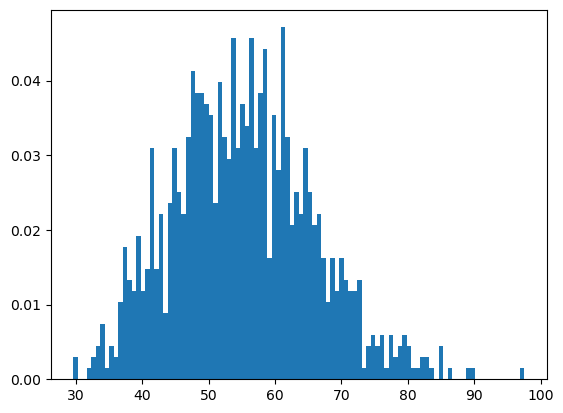

In [7]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
fig_chi, ax_chi = plt.subplots(1, 1)
df_chi = 55
random_chivalues = chi2.rvs(df_chi, size = 1000)
ax_chi.hist(random_chivalues, bins=100, density=True)
plt.show()

#### 9.3.3 $F$-Distribution

Named after Sir Ronald Fisher, this $F$-distribution is useful in determining the critical values in ANOVAs (analysis of variance). If we want to investigate whether two groups have the same variance, we have to calculate the ratio of the sample standard deviations squared:

$$F = \frac{S_x^2}{S_y^2}$$

Where $S_x$ is the sample standard deviation of the first sample, and $S_y$ is the sample standard deviation of the second sample. The distribution of this statistic is the $F$ distribution, and can be plotted using `scipy.stats.f()`.

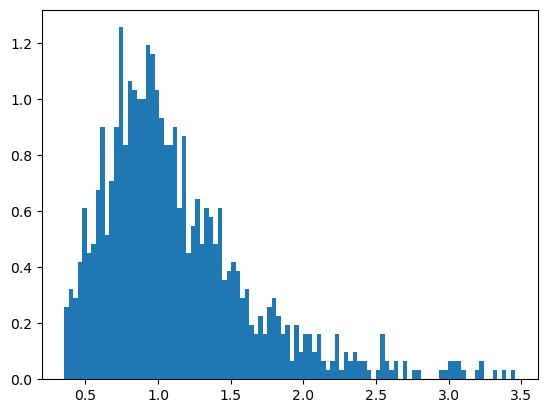

In [8]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig_f, ax_f = plt.subplots(1, 1)
dfn_f, dfd_f = 29, 18   # degrees of freedom in numerator (n) and denominator (d)
random_fvalues = f.rvs(dfn_f, dfd_f, size = 1000)
ax_f.hist(random_fvalues, bins=100, density=True)
plt.show()

### <font color="blue">9.4 Statistical Tests of Means of Numerical Data</font>

Instead of going through every single possible test in the table presented in Section 9.2, let's just focus on some of the most common tests. The two most common types of tests would involve tests appropriate for numerical data, and those appropriate for categorical data. We can start with tests that look at the **means** of numerical data, whether it be one, two or multiple samples in question. 

This section covers different hypothesis tests for the mean valies of groups, and also shows how to implement each of these tests in Python:
- Comparison of one group with a fixed value
- Comparison of two groups with respect to each other
- Comparison of three or more groups with each other

In each case, we have to be careful about distinguishing between parametric and non-parametric cases. Parametric tests are only used if the data is approximately normally distributed, and are more sensitive than non-parametric tests. If the data is not normally distributed, or if they are only available in a ranked form, then we have to use the corresponding nonparametric test.

#### 9.4.1 One Sample Tests

A *one sample test of means* is a statistical hypothesis test used to determine whether an observed mean is different from a specific value (that value is called the theoretical or reference value). 

##### 9.4.1.1 One-Sample t-Test for a Mean Value

To check the mean value of normally distribute data against a reference value, we typically use the **one sample t-test** which is based on the $t$-distribution. 

If we knew the mean and the standard deviation of a normally distributed population, we could calculte the corresponding standard error, and use the values from the normal distribution to determine how likely it is to find a certain value. But in practice, we need to be able to estimate the mean and standard deviation from the sample. The $t$-distribution, which characterizes the distribution of sample means for normally distributed data, deviates slightly from the normal distribution.

When applying the one-sample $t$-test, one would calculate the $t$-statistic and the corresponding $p$-value for the test. So, how does one do this? Let's take a look at an example we can walk through together. *We take 100 normally distributed data, with a mean of 7 and a standard deviation of 3. What is the chance of finding a mean value at a distance of 0.5 or more from the mean? Assume your observed mean from the sample is 7.10 and standard deviation is 3.12 with SEM 0.312.* The steps we would have to take are as follows:
1. From the population, we know the mean value is 7 with a standard deviation of 3
2. An observer takes 100 random samples from the population and finds that the sample mean is 7.10, standard deviation is 3.12, and SEM 0.312. Note that this is close to but not exactly the real mean of 7.
3. The distribution of the sample mean follows a $t$-distribution, and the SEM characterizes the width of that distribution.
4. We have to calculate the $t$-statistic, defined as $$t = \frac{\bar{x}-\mu_0}{s/\sqrt(n)}$$
5. We would have to find the corresponding $p$-value to test our hypothesis (ie. how likely it is that the real mean has a value of 6.5 or more extreme relative to the sample mean). Note that if you are looking at a two-tailed hypothesis t-test, you would have to multiply by `2*CDF(t-statistic)` to ensure you are getting the probabilities on each end of the distribution. 

But, what if there was one line of code that could do all that for us? Luckily, there is! For a one-sample $t$-test, we can use `scipy.stats.ttest_1samp(a, popmean, axis=0, alternative='two-sided')` where `alternative` can be `two-sided`, `less` (one-sided towards the left), or `greater` (one-sided towards the right).

In [9]:
from scipy import stats
# Create random values with mean of 5 - will test if mean of random sample is equal to the true mean, and different mean
# We will reject the null hypothesis in the second case and not the first
ttest1_rng = np.random.default_rng()
ttest1_rvs = stats.norm.rvs(loc=5, scale=10, size=(50, 1), random_state=ttest1_rng)

# Run the test for true mean
print("Test for True Mean |", stats.ttest_1samp(ttest1_rvs, 5))

# Run the test for different mean (different coding structure for output as example)
ttest1_tstat, ttest1_pval = stats.ttest_1samp(a = ttest1_rvs, popmean = 3)
print("Test for Different Mean | t-statistic:",ttest1_tstat, "p-value:", ttest1_pval)

Test for True Mean | Ttest_1sampResult(statistic=array([1.60938721]), pvalue=array([0.11395628]))
Test for Different Mean | t-statistic: [3.19773846] p-value: [0.00242769]


##### 9.4.1.2 One-Sample Wilcoxon Signed Rank Sum Test

In the previous $t$-test, we assumed that the data was normally distributed. But what happens if it isn't? In that case, we need to use a non-parametric test called the **Wilcoxon signed rank sum test**. In contrast to the one-sample $t$-test, this test checks for a *difference* from the null. The three main steps for this test are as follows:
1. Calculate the difference between each observation and the value of interest
2. Ignoring the signs of the differences, rank them in order of magnitude
3. Calculate the sum of the ranks of all the negative (or positive) ranks, corresponding to the observations below (or above) the chosen hypothetical value. 

**Example**: Let's say that you are looking at the daily energy intake of 11 healthy women, and you want to see how their intake differs from the recommended intake of 7725 kJ. You would hve to create a ranking table and (1) calculate the difference between each observation, (2) rank them by magnitude, and (3) calculate the sum of ranks. We can easily do (1) and (2) by presenting the graph below. But, we can also just use our raw data set (daily energy intake of 11 healthy women) and write out some Python code. We'll do that after the table.

<table>
    <tr>
        <td style="text-align: left;">Subject</td>
        <th scope="col" style="text-align: left;">Daily Energy Intake (kJ)</th>
        <th scope="col" style="text-align: left;">Difference from 7725 kJ</th>
        <th scope="col" style="text-align: left;">Ranks of Differences</th>
    </tr>
    <tr>
        <th scope="row" style="text-align: left;">1</th>
        <td style="text-align: left;">5260</td>
        <td style="text-align: left;">2465</td>
        <td style="text-align: left;">11</td>
    </tr>
    <tr>
        <th scope="row" style="text-align: left;">2</th>
        <td style="text-align: left;">5470</td>
        <td style="text-align: left;">2255</td>
        <td style="text-align: left;">10</td>
    </tr>
    <tr>
        <th scope="row" style="text-align: left;">3</th>
        <td style="text-align: left;">5640</td>
        <td style="text-align: left;">2085</td>
        <td style="text-align: left;">9</td>
    </tr>
    <tr>
        <th scope="row" style="text-align: left;">4</th>
        <td style="text-align: left;">6180</td>
        <td style="text-align: left;">1545</td>
        <td style="text-align: left;">8</td>
    </tr>
    <tr>
        <th scope="row" style="text-align: left;">5</th>
        <td style="text-align: left;">6390</td>
        <td style="text-align: left;">1335</td>
        <td style="text-align: left;">7</td>
    </tr>
    <tr>
        <th scope="row" style="text-align: left;">6</th>
        <td style="text-align: left;">6515</td>
        <td style="text-align: left;">1210</td>
        <td style="text-align: left;">6</td>
    </tr>
    <tr>
        <th scope="row" style="text-align: left;">7</th>
        <td style="text-align: left;">6805</td>
        <td style="text-align: left;">920</td>
        <td style="text-align: left;">4</td>
    </tr>
    <tr>
        <th scope="row" style="text-align: left;">8</th>
        <td style="text-align: left;">7515</td>
        <td style="text-align: left;">210</td>
        <td style="text-align: left;">1.5</td>
    </tr>
    <tr>
        <th scope="row" style="text-align: left;">9</th>
        <td style="text-align: left;">7515</td>
        <td style="text-align: left;">210</td>
        <td style="text-align: left;">1.5</td>
    </tr>
    <tr>
        <th scope="row" style="text-align: left;">10</th>
        <td style="text-align: left;">8230</td>
        <td style="text-align: left;">-505</td>
        <td style="text-align: left;">3</td>
    </tr>
    <tr>
        <th scope="row" style="text-align: left;">11</th>
        <td style="text-align: left;">8770</td>
        <td style="text-align: left;">-1045</td>
        <td style="text-align: left;">5</td>
    </tr>
</table>

In the table above, we basically are testing the deviation of the measurement from the value of 7725. If we add up the ranks of the negative differences (3 + 5 = 8), we can look it up in a corresponding table to determie if that value is significant or not. But, being able to do this through Python is much easier, especially with the `scipy.stats.wilcoxon(data-checkValue)` function.

In [10]:
from scipy.stats import wilcoxon
data_kJ = [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770]
recommended_kJ = 7725
difference_kJ = [data - recommended_kJ for data in data_kJ]
wrank_kJ, wrank_pVal = wilcoxon(difference_kJ)
print("Rank:", wrank_kJ, "| p-Value:", wrank_pVal)

if wrank_pVal < 0.05:
    print("Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference")
else:
    print("Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference")

Rank: 8.0 | p-Value: 0.0244140625
Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference


#### 9.4.2 Two Sample Tests

When comparing two groups with each other, we want to use *two sample tests*. But there are two ways of looking at this. You could potentially test for the significance of the differences and apply a one sample test on the difference between groups; or you can test the significance of variance of differences between the means of the two groups. These give us different types of tests to use. 

##### 9.4.2.1 Paired $t$-Test

In a **paired $t$-test**, we are basically using a one-sample $t$-test for the mean difference between values of two groups. Let's say we are looking at the size of students when they enter primary school and after their first year, to check if they have grown. Since we are only interested in the ddifference ine ach subject between the first and the second measurement, this test is called a paired $t$-test. We can use one of two ways of solving for this:
1. Use a one-sample $t$-test for the difference with `scipy.stats.ttest_1samp()`
2. Use a two-sample paired $t$-test with `scipy.stats.ttest_rel()`

Both of these methods will provide the same result apart from minute numerical differences.

In [11]:
import numpy as np
from scipy import stats

# Create dummy data
np.random.seed(1234)
studentsize_data = np.random.randn(10)+0.1
primary_data = np.random.randn(10)*5
firstyear_data = primary_data + studentsize_data

# Method 1 - One Sample t-Test for Differences
print("One Sample Test:", stats.ttest_1samp(studentsize_data, 0))

# Method 2 - Two Sample Paired t-Test
print("Two Sample Paired t-Test:", stats.ttest_rel(firstyear_data, primary_data))

One Sample Test: Ttest_1sampResult(statistic=-0.12458492298731401, pvalue=0.9035904508547086)
Two Sample Paired t-Test: Ttest_relResult(statistic=-0.12458492298731347, pvalue=0.9035904508547089)


##### 9.4.2.2 Unpaired $t$-Test

In an **unpaired $t$-test**, we compare the values between two **independent** groups. An example would be the comparison of the effect of two medications given to two different groups of patients. The idea is the same as the one-sample $t$-test, but instead of looking at the variance of the mean, we now need the variance of the difference between the means of the two groups. 

But, we can simply use the `scipy.stats.ttest_ind(group1, group2)` function to do the work for us. This is a test for the null hypothesis that 2 independent samples have an identical average (expected) values. If you can reject the null hypothesis, it means that the two values are different (ie. there are different effects).

In [12]:
import scipy.stats as stats

# Create dummy unpaired data sets: 24h total energy expenditure in groups of active and inactive children
activeE = [7.53,7.48,8.08,8.09,10.15,8.4,10.88,6.13,7.9,7.05,7.48,7.58,8.11]
lazyE = [9.21,11.51,12.79,11.85,9.97,8.79,9.69,9.68,9.19]

# We perform an unpaired t-test
# Null hypothesis assumes the two groups have the same mean
energy_tstat, energy_pVal = stats.ttest_ind(activeE, lazyE)
print("t Statistic:", energy_tstat, "| p-Value:", energy_pVal)

if energy_pVal < 0.05:
    print("Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference")
else:
    print("Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference")

t Statistic: -3.9455649161549835 | p-Value: 0.0007989982111700593
Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference


##### 9.4.2.3 Mann-Whitney Test for Nonparametric Comparison of Two Groups

If the measurement values from two groups are not normally distributed, we have to resort to a non-parametric test. The most common non-parametric test for the comparison of two **independent** groups is the **Mann-Whitney(-Wilcoxon) test AKA Wilcoxon Rank-Sum Test**. Note the difference from the Wilcoxon SIGNED rank sum test!.

We can use the `scipy.stats.mannwhitneyu(group1, group2)` function from the `scipy.stats` library to conduct a Mann-Whitney U test, where $u$ is the test-statistic.

In [13]:
import scipy.stats as stats

# Create dummy data (assume these are data sets with and without medication)
mwgroup1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
mwgroup2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

# We want to see if medication leads to a change in the average results taken
# Perform test - must be two-sided since we simply don't want the values to be the same (can be higher or lower)
mw_u, mw_pVal = stats.mannwhitneyu(mwgroup1, mwgroup2, alternative='two-sided')
print("U Statistic:", mw_u, "| p-Value:", mw_pVal)

if wrank_pVal < 0.05:
    print("Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference")
else:
    print("Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference")

U Statistic: 50.0 | p-Value: 0.21138945901258455
Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference


#### 9.4.3 Statistical Tests to Compare Multiple Groups

In some cases, we may want to compare the means of more than two groups. This is where **ANOVA**, ANalysis Of VAriance, comes in to play. The groups mean differences will be inferred  by analyzing variances, and ANOVA uses the $F$-test to check the group's mean equality. What does this mean? Let's try to break this down and understand the principle behind ANOVA.

The idea behind ANOVA is to divide the variance into the variance **between groups** and that *within groups*, and see if those distributions match the null hypothesis that all groups come from the same distribution. The variables that distinguish the different groups are called factors or treatments. In other words, we can compare a group with **No Treatment**, another with **Treatment A**, and a third with **Treatment B**. In this case, we perform a **one-way ANOVA** because the *treatment* is the sole treatment factor we are analyzing. 

If we do the same test with men and with women, then we have a *two-factor* or **two-way ANOVA**. No matter which one you have, it is important to have exactly the same number of samples in each analysis group to created a balanced ANOVA.

For both options, the null hypothesis is that there is no difference between the groups, and so the test is based on a comparison of the observed variation between the groups (ie. between their means) vs. the expected variation from the observed variability within the groups (ie. between subjects). Let's take a look at some examples of one-way and two-way ANOVAs, and alternative types of tests.

##### 9.4.3.1 One-Way ANOVA

Let's take a look at the amount of red cell folate levels ($\mu g/l$) in three groups of cardiac bypass patients given different levels of nitrous oxide ventilation. In total, 22 patients were included in the analysis. The null hypothesis of ANOVAs is that all groups come from the same population. So, a test whether to keep or reject this null hypothesis can be done with Python's SciPy library: `scipy.stats.f_oneway(group1, group2, group3)`.

If you want a more detailed output of ANOVA, we cannot use `scipy.stats` but rather `statsmodels` from `pandas`.

In [14]:
import scipy.stats as stats

# Create dummy data (for the three treatments in the example)
folate1 = [243, 251, 275, 291, 347, 354, 380, 392]
folate2 = [206, 210, 226, 249, 255, 273, 285, 295, 309]
folate3 = [241, 258, 270, 293, 328]

# We can use a one-way ANOVA
folate_F, folate_pVal = stats.f_oneway(folate1, folate2, folate3)
print("F Statistic:", folate_F, "| p-Value:", folate_pVal)

if folate_pVal < 0.05:
    print("Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference")
else:
    print("Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference")

F Statistic: 3.7113359882669763 | p-Value: 0.043589334959178244
Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference


In [15]:
# Use pandas and statsmodels for more detailed results
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

folatedata = {
    "Levels": [243, 251, 275, 291, 347, 354, 380, 392, 206, 210, 226, 249, 255, 273, 285, 295, 309, 241, 258, 270, 293, 328],
    "Treatment": [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
}

folate_df = pd.DataFrame(folatedata)    
folate_model = ols('Levels ~ C(Treatment)', folate_df).fit()  # linear regression model (will discuss in future)
folate_anovaResults = anova_lm(folate_model)
print(folate_anovaResults)

                df        sum_sq      mean_sq         F    PR(>F)
C(Treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN


##### 9.4.3.2 Kruskal-Wallis Test

When we compare two groups to each other, we use the $t$-test when the data are normally distributed, and the non-parametric Mann-Whitney test otherwise. For three or more groups, the test for normally distributed data is the ANOVA test. But, what happens when your data is not normally distributed? You would have a corresponding non-parametric test: the **Kruskal-Wallis Test**. When the null  hypothesis is true, the test statistic for the Kruskal-Wallis test will follow a chi-squared distribution. 

We will not go over this, but you can use `scipy.stats.mstats.kruskalwallis()` to perform such a test.

##### 9.4.3.3 Two-Way ANOVA

Compared to one-way ANOVAs, the analysis with two-way ANOVAs has a new element. We cannot limit ourselves to looking at whether each of the factors is significant; we also have to check if the **interaction** of the factors has a significant influence on the data distribution. For such analyses, we would need to use a combination of `pandas` and `statsmodels` for a full table of results for further interpretation. We will not cover this in PHYS 267.

##### 9.4.3.4 Three-Way ANOVA

Well, now we are getting even more complicated. At this point, if you have more than two factors, it is recommended that we use statistical modeling for data analysis. A combination of `seaborn` for data visualization and `pandas` and `statsmodels` for data analysis would be a good place to start. We also will not be covering this in PHYS 267. 

### <font color="blue">9.5 Statistical Tests on Categorical Data</font>

In a data sample, the number of data falling into a particular group is called the frequency, so the analysis of categorical data is the analysis of freqneices. When two or more groups are compared, the dat are often shown in the form of a frequency table, or contingency table.

If we have only one factor (ie. a table with only one row), the analysis options are somewhat limited. In contrast, a number of statistical tests exist for the analysis of frequency tables:
- **Chi-Squared Test**: most common type that checks if the entries in the individual cells in a frequency table all come from the same distribution
    - Checks the null hypothesis that the results are independent of the row or column in which they appear
    - The alternative hyupothesis does not specify the type of association, so close attention to the data is required to interpret the information provided by the test
- **Fisher's Exact Test**: While the chi-squared test is approximate, this test is exact; it is computationally more intricate and time-consuming and was recommended only for small sample numbers due to its robust analysis
- **McNemar's Test**: This is a *matched pair* test for 2 x 2 tables
- **Cochran's Q Test**: This is an extension to McNemar's test for related samples that provides a method for testing for differences between three or more matched/paired sets of frequencies or proportions

Of these tests, we will only cover the chi-squared test because the chi-squared distribution will be discussed when we get to modelling and data fitting in the future.

#### 9.5.1 One-Way Chi-Squared Test

Let's assume that you go hiking with your friends. Every evening, you draw lots as to who has to clean the campground. At the end of the trip, you end up with these results:

<table>
    <tr>
        <th scope="col" style="text-align: left;">You</th>
        <th scope="col" style="text-align: left;">John</th>
        <th scope="col" style="text-align: left;">Jane</th>
        <th scope="col" style="text-align: left;">Bob</th>
        <th scope="col" style="text-align: left;">Bill</th>
        <th scope="col" style="text-align: left;">Rob</th>
    </tr>
    <tr>
        <td style="text-align: left;">10</td>
        <td style="text-align: left;">6</td>
        <td style="text-align: left;">5</td>
        <td style="text-align: left;">4</td>
        <td style="text-align: left;">5</td>
        <td style="text-align: left;">3</td>
    </tr>
</table>

It's clear that you did a lot more work. Let's find out how likely it is that this distribution came up by chance! 

$$\text{expected frequency} = \frac{n_{\text{total}}}{n_{\text{people}}}$$

Let's assume that the expected frequency, defined above, is 5.5. Then, the likelihood that this distribution came up by chance can be calculated using `scipy.stats.chisquare(data)`.

In [16]:
import scipy.stats as stats
hiking_data = [10, 6, 5, 4, 5, 3]
chi2_statistic, chi2_pVal = stats.chisquare(hiking_data)
print(chi2_pVal)

# It could have really been by chance that you did more work based on the dataset!

0.37313038594870584


#### 9.5.2 Chi-Squared Contingency Test

When data can be arranged in rows and columns, we can check if the numbers in the individual columns are contingent on the row value. For this reason, this test is called the **chi-squared contingency test**. It is based on a test statistic that measures the divergence of the observed data from the values that would be expected under the null hypothesis of no association. We will not be covering this in this chapter. 

### <font color="green">9.6 Practice Problems</font>

Try to answer these problems yourself before the live lectures and tutorials. Feel free to connect with your peers on Discord or on campus if you prefer to work together. If you are struggling with them, we will cover them during live sessions.

#### Problem 9A

Suppose you want to know the mean height of your favourite species of plant. You want to see if it is 20 inches. So, you collect a random sample of 20 plants and record their heights in inches: 18, 19, 20, 22, 19, 20, 19, 17, 21, 19, 20, 21, 18, 16, 19, 21, 24, 23, 17, 19. Explain what test to use, use Python to run the test and interpret your results. 

#### Problem 9A - Solution

In [19]:
import numpy as np
from scipy.stats import ttest_1samp

# Define the sample
sample = np.array([18, 19, 20, 22, 19, 20, 19, 17, 21, 19, 20, 21, 18, 16, 19, 21, 24, 23, 17, 19])

statA, pNormA = stats.normaltest(sample)
if pNormA > 0.05:
    print("We confirm the data is distributed normally with p-value of", pNormA)
else:
    print("We confirm the data is NOT distributed normally with p-value of", pNormA)


# Define the null hypothesis
null_hypothesis = 20

# Calculate the t-value and p-value
t_value, p_value = ttest_1samp(sample, null_hypothesis)

# Print the results
print("t-value: ", t_value)
print("p-value: ", p_value)

if p_value < 0.05:
    print("Since p-value is <0.05, we REJECT the null hypothesis and say the mean is not\
equal to 20 --> This means the mean height must be different than 20 inches.")
else:
    print("Since p-value is >=0.05, we ACCEPT the null hypothesis and say the mean is close\
to 20 --> This means the mean height is not different than 20 inches.")



We confirm the data is distributed normally with p-value of 0.6722729540751081
t-value:  -0.8897565210026062
p-value:  0.38472423043145376
Since p-value is >=0.05, we ACCEPT the null hypothesis and say the mean is closeto 20 --> This means the mean height is not different than 20 inches.


#### Problem 9B

In a clinic, 15 lazy patients weight [76, 101, 66, 72, 88, 82, 79, 73, 76, 85, 75, 64, 76, 81, 86] kg and 15 sporty ptients weight p64, 65, 56, 62, 59, 76, 66, 82, 91, 57, 92, 80, 82, 67, 54] kg. Are the lazy patients significantly heavier? Pick the proper test to use and interpret your results.

#### Problem 9B - Solution

In [21]:
dataLazy = [76, 101, 66, 72, 88, 82, 79, 73, 76, 85, 75, 64, 76, 81, 86]
statLazy, pNormLazy = stats.normaltest(dataLazy)
if pNormLazy > 0.05:
    print("We confirm the lazy weights data is distributed normally with p-value of", pNormLazy)
else:
    print("We confirm the lazy weights data is NOT distributed normally with p-value of", pNormLazy)
# There are two sets of data so I must do the same thing for the second set of data!
dataSporty = [64, 65, 56, 62, 59, 76, 66, 82, 91, 57, 92, 80, 82, 67, 54]
statSporty, pNormSporty = stats.normaltest(dataSporty)
if pNormSporty > 0.05:
    print("We confirm the sporty weights data is distributed normally with p-value of", pNormSporty)
else:
    print("We confirm the sporty weights data is NOT distributed normally with p-value of", pNormSporty)

We confirm the lazy weights data is distributed normally with p-value of 0.19204806032435315
We confirm the sporty weights data is distributed normally with p-value of 0.34678775457262334


In [23]:
tB, pValB = stats.ttest_ind(dataLazy, dataSporty)
print("The t-statistic is", tB, "and the corresponding p-value is", pValB)

if pValB < 0.05:
    print("p < 0.05 so we REJECT the null hypothesis and data sets must be significantly different")
else:
    print("p >= 0.05 so we ACCEPT the null hypothesis and data sets are NOT significantly different")

The t-statistic is 2.0968730776547093 and the corresponding p-value is 0.04516066585880743
p < 0.05 so we REJECT the null hypothesis and data sets must be significantly different
